# Manipulación de Datos en Pytorch

Antes de comenzar a usar PyTorch, es recomendable verificar con qué estamos trabajando.

In [1]:
# Importar la librería es importante para poder usarla :D
import torch
import sys
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
print(f"Versión de Python: {sys.version}")
print(f"Versión de PyTorch: {torch.__version__}")
print(f"Disponibilidad de CUDA: {torch.cuda.is_available()}")
print(f"Versión de CUDA: {torch.version.cuda if torch.cuda.is_available() else None}")

Versión de Python: 3.12.10 (tags/v3.12.10:0cc8128, Apr  8 2025, 12:21:36) [MSC v.1943 64 bit (AMD64)]
Versión de PyTorch: 2.8.0+cu129
Disponibilidad de CUDA: True
Versión de CUDA: 12.9


Nótese la coincidencia entre la versión de CUDA (12.6) y la versión de PyTorch (2.8.0+cu126). La versión de PyTorch nos indica que es PyTorch 2.8.0 compilado para CUDA 12.6. Si la versión del compilado de PyTorch y la versión de CUDA del sistema no coinciden, no funcionará.
Se puede acceder a las distintas versiones de PyTorch en: https://pytorch.org/get-started/previous-versions/

El código de distintas versiones de Pytorch no necesariamente es compatible entre sí.
La versión de CUDA dependerá principalmente de los controladores instalados en la máquina y estos a su vez de la GPU. Más información [aquí](https://developer.nvidia.com/cuda-gpus) y [aquí](https://docs.nvidia.com/deploy/cuda-compatibility/index.html).

---
El Aprendizaje Profundo se engloba dentro del Aprendizaje Computacional. Tiene como objetivo generar un modelo para resolver un problema a partir de datos. Muchos datos. ¡Inmensas cantidades de datos!

Por eso es vital cómo manejar y almacenar esos datos.

En PyTorch y otras librerías similares los cálculos se hacen sobre datos en punto flotante (números reales) y la mayoría de los procesos implican operar arrays n-dimensionales. Por convención nos referimos a esta estructura de datos como *tensor*. Pese al nombre específico, un tensor no es más que un array multidimensional. Un vector es un array de 1 dimensión, una matriz es un array de 2 dimensiones y un tensor es un array de cualquier número de dimensiones.
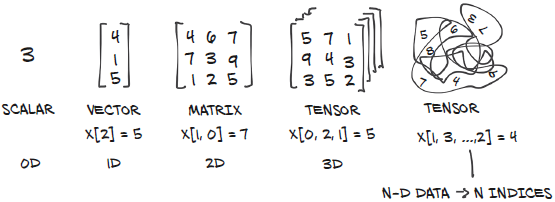


Aunque su funcionamiento interno sea distinto, la usabilidad de los tensores en PyTorch es similar a la de los arrays de Numpy. Se puede obtener un tensor de PyTorch a partir de un array de Numpy y viceversa.

In [3]:
np_array = np.random.rand(10) # Generamos con Numpy un vector de tamaño 10 a partir de la distribución uniforme entre [0,1)
print(np_array)
torch_tensor = torch.rand(10) # Generamos con PyTorch un vector de tamaño 10 a partir de la distribución uniforme entre [0,1)
print(torch_tensor)
np_array_from_torch_tensor = torch_tensor.numpy()
print(np_array_from_torch_tensor)
torch_tensor_from_np_array = torch.from_numpy(np_array)
print(torch_tensor_from_np_array)

[0.93809164 0.56471462 0.60602172 0.0994171  0.72097591 0.37728321
 0.86528228 0.42972223 0.30391189 0.25957465]
tensor([0.0459, 0.8097, 0.5060, 0.8373, 0.1210, 0.9481, 0.4836, 0.1592, 0.7511,
        0.7658])
[0.04593283 0.8096732  0.5060277  0.83728063 0.12101299 0.9481242
 0.4836492  0.15924066 0.7510656  0.76583046]
tensor([0.9381, 0.5647, 0.6060, 0.0994, 0.7210, 0.3773, 0.8653, 0.4297, 0.3039,
        0.2596], dtype=torch.float64)


Su indexado se realiza exactamente con la misma sintaxis y ambos siguen las mismas reglas de *broadcasting*.

In [4]:
print(np_array_from_torch_tensor[1:3])
print(torch_tensor[1:3])

[0.8096732 0.5060277]
tensor([0.8097, 0.5060])


¿Entonces por qué no usamos Numpy en lugar de los tensores de PyTorch? Porque los tensores de PyTorch pueden mandarse a la GPU para realizar las operaciones en ella. Podemos consultar dónde está alojado el tensor y moverlo de memoria principal a memoria de video.

In [5]:
print(f"torch_tensor está alojado en: {torch_tensor.device}")
torch_tensor_gpu = torch_tensor.to("cuda")
print(f"torch_tensor está ahora alojado en: {torch_tensor_gpu.device}")

torch_tensor está alojado en: cpu
torch_tensor está ahora alojado en: cuda:0


Nótese que la sentencia para mover a la GPU el tensor implica una asignación. La operación no se hace sobre el mismo objeto tensor, sino que se genera uno nuevo. Esto tiene sentido si uno lo piensa. El tensor es un objeto en memoria, pero no queremos modificar ese objeto, sino "moverlo" a otra memoria. Estamos generando un nuevo tensor con la misma información.

In [6]:
print(f"El torch_tensor original sigue en: {torch_tensor.device}")

El torch_tensor original sigue en: cpu


Es llamativo también que para indicar que el tensor está alojado en memoria de video se usa el indicativo 'cuda:0'. 'cuda' indica que está en memoria de video y el 0 indica el índice del dispositivo en el que está. Si dispusieramos de varias GPUs podríamos mover tensores entre distintas GPUs.

Ya que PyTorch permite operar en la GPU y nos interesa para acelerar nuestros cálculos, vamos a probar cómo evolucionan los tiempos de operación con distintos tamaños de matrices en Numpy, PyTorch en CPU y PyTorch en GPU.

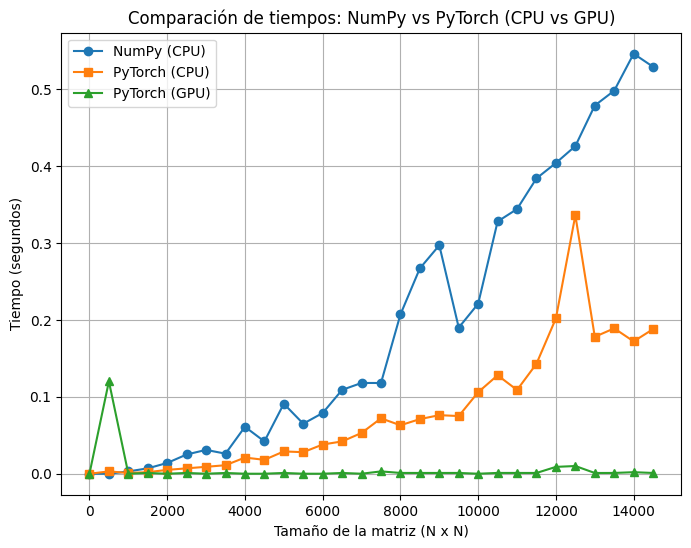

In [7]:
SIZES = [i*500 for i in range(30)]

numpy_times = []      # Lista para almacenar los tiempos de Numpy.
torch_cpu_times = []  # Lista para almacenar los tiempos de PyTorch en CPU.
torch_gpu_times = []  # Lista para almacenar los tiempos de PyTorch en GPU.

for size in SIZES:

  # Operamos en Numpy
  A_np = np.random.rand(size, size).astype(np.float32)
  B_np = np.random.rand(size, size).astype(np.float32)

  start_time = time.time()
  C_np = A_np*B_np
  end_time = time.time()
  numpy_times.append(end_time-start_time)

  # Operamos en PyTorch en CPU
  A_torch_cpu = torch.from_numpy(A_np)
  B_torch_cpu = torch.from_numpy(B_np)

  start_time = time.time()
  C_torch_cpu = A_torch_cpu*B_torch_cpu
  end_time = time.time()
  torch_cpu_times.append(end_time-start_time)

  # Operamos en PyTorch en CPU
  A_torch_gpu = A_torch_cpu.to('cuda')
  B_torch_gpu = B_torch_cpu.to('cuda')

  start_time = time.time()
  C_torch_cpu = A_torch_gpu*B_torch_gpu
  end_time = time.time()
  torch_gpu_times.append(end_time-start_time)

# Gráfica de resultados
plt.figure(figsize=(8,6))
plt.plot(SIZES, numpy_times, marker='o', label="NumPy (CPU)")
plt.plot(SIZES, torch_cpu_times, marker='s', label="PyTorch (CPU)")
plt.plot(SIZES, torch_gpu_times, marker='^', label="PyTorch (GPU)")
plt.xlabel("Tamaño de la matriz (N x N)")
plt.ylabel("Tiempo (segundos)")
plt.title("Comparación de tiempos: NumPy vs PyTorch (CPU vs GPU)")
plt.legend()
plt.grid(True)
plt.show()

Como se puede observar, el tiempo de ejecución tiene un aumento mucho menor al trabajar con PyTorch en GPU respecto a Numpy y PyTorch en CPU. Es interesante observar que los tiempos de PyTorch en CPU son peores que los de Numpy aunque ambos funcionan en CPU. Pytorch, en su versión de CPU, es menos eficiente que Numpy.

Sin embargo, esta comparación no es del todo justa. Con ella en mente lo lógico sería usar siempre que sea posible Pytorch en GPU.

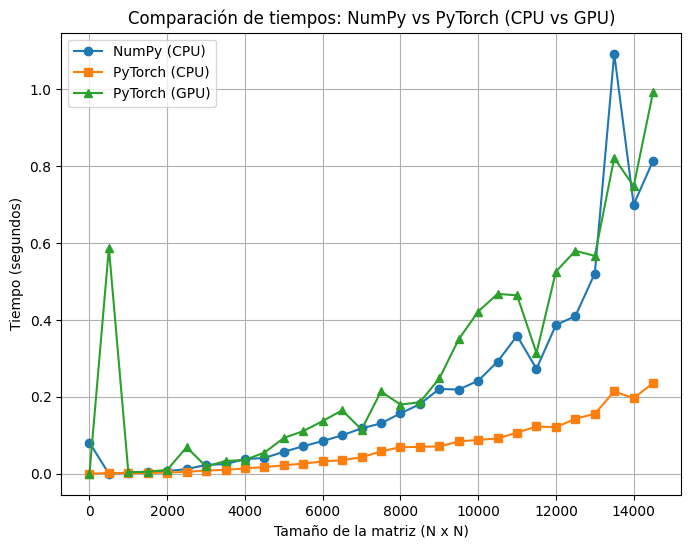

In [8]:
SIZES = [i*500 for i in range(30)]

numpy_times = []      # Lista para almacenar los tiempos de Numpy.
torch_cpu_times = []  # Lista para almacenar los tiempos de PyTorch en CPU.
torch_gpu_times = []  # Lista para almacenar los tiempos de PyTorch en GPU.

for size in SIZES:

  # Operamos en Numpy
  A_np = np.random.rand(size, size).astype(np.float32)
  B_np = np.random.rand(size, size).astype(np.float32)

  start_time = time.time()
  C_np = A_np*B_np
  end_time = time.time()
  numpy_times.append(end_time-start_time)

  # Operamos en PyTorch en CPU
  A_torch_cpu = torch.from_numpy(A_np)
  B_torch_cpu = torch.from_numpy(B_np)

  start_time = time.time()
  C_torch_cpu = A_torch_cpu*B_torch_cpu
  end_time = time.time()
  torch_cpu_times.append(end_time-start_time)

  # Operamos en PyTorch en GPU
  start_time = time.time()
  A_torch_gpu = A_torch_cpu.to('cuda')
  B_torch_gpu = B_torch_cpu.to('cuda')

  C_torch_cpu = A_torch_gpu*B_torch_gpu
  end_time = time.time()
  torch_gpu_times.append(end_time-start_time)

# Gráfica de resultados
plt.figure(figsize=(8,6))
plt.plot(SIZES, numpy_times, marker='o', label="NumPy (CPU)")
plt.plot(SIZES, torch_cpu_times, marker='s', label="PyTorch (CPU)")
plt.plot(SIZES, torch_gpu_times, marker='^', label="PyTorch (GPU)")
plt.xlabel("Tamaño de la matriz (N x N)")
plt.ylabel("Tiempo (segundos)")
plt.title("Comparación de tiempos: NumPy vs PyTorch (CPU vs GPU)")
plt.legend()
plt.grid(True)
plt.show()

In [10]:
SIZES = [i*500 for i in range(30)]
N_OPS = 50
numpy_times = []      # Lista para almacenar los tiempos de Numpy.
torch_cpu_times = []  # Lista para almacenar los tiempos de PyTorch en CPU.
torch_gpu_times = []  # Lista para almacenar los tiempos de PyTorch en GPU.

for size in SIZES:

  # Operamos en Numpy
  A_np = np.random.rand(size, size).astype(np.float32)
  B_np = np.random.rand(size, size).astype(np.float32)

  start_time = time.time()
  for i in range(N_OPS):
    C_np = A_np*B_np*i
  end_time = time.time()
  numpy_times.append(end_time-start_time)

  # Operamos en PyTorch en CPU
  A_torch_cpu = torch.from_numpy(A_np)
  B_torch_cpu = torch.from_numpy(B_np)

  start_time = time.time()
  for i in range(N_OPS):
    C_torch_cpu = A_torch_cpu*B_torch_cpu*i
  end_time = time.time()
  torch_cpu_times.append(end_time-start_time)

  # Operamos en PyTorch en GPU
  start_time = time.time()
  for i in range(N_OPS):
    A_torch_gpu = A_torch_cpu.to('cuda')
    B_torch_gpu = B_torch_cpu.to('cuda')

    C_torch_cpu = A_torch_gpu*B_torch_gpu*i
  end_time = time.time()
  torch_gpu_times.append(end_time-start_time)

# Gráfica de resultados
plt.figure(figsize=(8,6))
plt.plot(SIZES, numpy_times, marker='o', label="NumPy (CPU)")
plt.plot(SIZES, torch_cpu_times, marker='s', label="PyTorch (CPU)")
plt.plot(SIZES, torch_gpu_times, marker='^', label="PyTorch (GPU)")
plt.xlabel("Tamaño de la matriz (N x N)")
plt.ylabel("Tiempo (segundos)")
plt.title("Comparación de tiempos: NumPy vs PyTorch (CPU vs GPU)")
plt.legend()
plt.grid(True)
plt.show()

KeyboardInterrupt: 

Esta ejecución tarda mucho y creo que vendría siendo irrelevante.